# Machine Learning II: Introduction to Supervised Classification Methods

## Stand Alone reading: Learning concepts and theory

### What is learning?

In machine learning, the journey from raw data to a reliable model involves understanding several key concepts that are crucial for creating models that not only perform well on known data but can also generalize to new, unseen data. Two such foundational concepts are the **training error** (or in-sample error) and the **generalization error** (or testing error). Let's delve deeper into these terms and their significance in the learning process.

####  Training Error (In-sample Error), $E_{\text{in}}$

The **training error**, denoted as $E_{\text{in}}$, is the error rate or loss calculated over the training dataset. The training dataset consists of all the data samples observed and used during the model's learning phase. This error measures how well the model has learned to predict or fit the data it was trained on. A lower training error indicates that the model has effectively captured the underlying patterns in the training data.

####  Generalization Error (Testing Error), $E_{\text{out}}$

In contrast, the **generalization error**, denoted as $E_{\text{out}}$, is a theoretical measure of how well the trained model performs on any new, unseen data. Since this data is not part of the training phase, the generalization error is an estimate of the model's ability to apply what it has learned to different datasets. In practice, we approximate $E_{\text{out}}$ using techniques like cross-validation and by evaluating the model on a separate testing dataset.

####  The Relationship Between $E_{\text{in}}$ and $E_{\text{out}}$

One of the fundamental insights in machine learning is the observation that:

$$E_{\text{out}} \geq E_{\text{in}}.$$

This inequality highlights that the error on new, unseen data is generally higher than the error on the training data. This makes intuitive sense because models tend to fit the data they are trained on, and new data might present patterns or variations not captured during training.

#####  The Goal of Learning

The ultimate goal of learning in machine learning is to minimize the generalization error, $E_{\text{out}}$. However, since we directly control only the training process, our strategies revolve around minimizing $E_{\text{in}}$ with the hope that $E_{\text{out}}$ will also be low. This leads to two intuitive strategies:

1. **Minimize Training Error:** Aim for $E_{\text{in}} \rightarrow 0$, which suggests that the model is effectively learning the patterns within the training data.
2. **Close the Gap Between Training and Generalization Error:** Ensure that $E_{\text{out}}\approx E_{\text{in}}$. This is crucial for building models that not only perform well on training data but also generalize effectively to new data. We express this goal as:

   $$E_{\text{in}} \leq E_{\text{out}} \leq E_{\text{in}} + \Omega,$$

   where $\Omega \rightarrow 0$. Here, $\Omega$ represents a small margin of error, indicating that the difference between $E_{\text{out}}$ and $E_{\text{in}}$ should be minimized.

####  Cross-validation: A Tool for Estimating $E_{\text{out}}$

Cross-validation is a powerful technique used to empirically estimate the generalization error. By partitioning the available data into multiple training and validation sets, we can train the model multiple times and average the results to get a more accurate estimate of how well the model is likely to perform on unseen data.

####  Conclusion

Understanding the relationship between training error and generalization error is fundamental in machine learning. By focusing on minimizing $E_{\text{in}}$ while ensuring it closely tracks $E_{\text{out}}$, we can create models that are both accurate and robust, capable of generalizing well to new, unseen data.

### Probably approximately correct (PAC) learning

In the realm of machine learning, a crucial aspect of evaluating model performance and ensuring reliability is understanding how close our model's predictions are to being correct on unseen data, given certain problem parameters. This concept is encapsulated in the theory of Probably Approximately Correct (PAC) Learning. PAC Learning provides a framework to quantify the generalization error, $E_{\text{out}}$, in terms of the model's training error, $E_{\text{in}}$, and other critical factors such as the number of samples ($N$) and the dimensionality of the problem ($d$). 

#### Characterizing the Generalization Error Gap, $\Omega$

One of the key insights from PAC Learning is the ability to characterize the gap between the training error and the generalization error, $\Omega$, with respect to the inherent complexity of the problem and the model. This gap can be mathematically represented as:

$$E_{\text{out}} \leq E_{\text{in}} + \mathcal{O}\big(\sqrt{\frac{\log{C}}{N}}\big),$$

where $C$ represents the complexity of the model class, also known as the hypothesis space. This equation highlights how the difference between the generalization error and the training error is influenced by both the number of samples $N$ and the complexity measure $C$ of the model class.

#### The Role of Model Complexity and Sample Size

- **Model Complexity ($C$):** The complexity of the model class refers to the range of functions or hypotheses the model can adopt to fit the training data. A more complex model has a larger hypothesis space, allowing it to capture more intricate patterns in the data. However, higher complexity models are also more prone to overfitting, capturing noise in the training data as if it were a significant pattern, which can adversely affect the generalization error.

- **Number of Samples ($N$):** The number of samples in the training data plays a crucial role in determining the accuracy of the model's predictions on new, unseen data. With more samples, the model has more information to learn from, which typically leads to a better approximation of the underlying data distribution and, consequently, a smaller gap between the training and generalization errors.

#### Implications of PAC Learning

The PAC Learning framework provides a powerful theoretical basis for understanding the trade-offs between model complexity and the size of the training dataset. By characterizing the generalization error in terms of these parameters, PAC Learning helps guide the choice of model complexity and the amount of data needed to achieve a desired level of performance on unseen data. It underscores the importance of balancing the model's complexity with the available data to minimize overfitting while ensuring the model is sufficiently expressive to capture the underlying patterns in the data.

#### Conclusion

PAC Learning offers a foundational perspective in machine learning, emphasizing the balance between training error, model complexity, and sample size. By understanding and applying the principles of PAC Learning, practitioners can make informed decisions about model selection and training strategies, aiming for models that are not only accurate on training data but also generalize well to new, unseen data.


**QUIZ:** 
<li> Which will be the effect of having a large number of data? 
<li> Will selecting a model with small complexity reduce the out of sample error?
</div>

Before going further in this matter let us open the box of the learning process and observe which parts it is composed of.

## Inside the learning process

Consider a simple two dimensional problem.

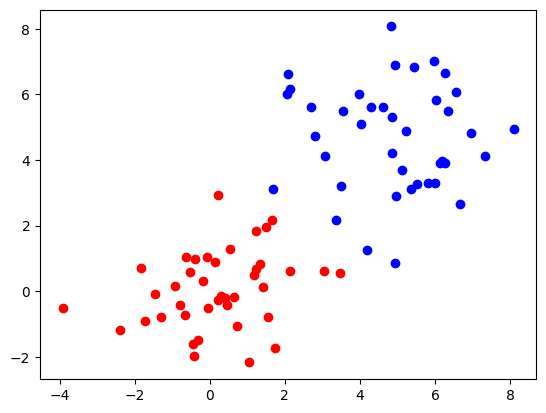

In [1]:
#from sklearn import 
import numpy as np

#Create some data
X = np.concatenate([1.25*np.random.randn(40,2),5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)),-np.ones((40,1))])

#Visualize
import matplotlib.pyplot as plt
plt.scatter(X[0:40,0],X[0:40,1],color='r')
plt.scatter(X[40:,0],X[40:,1],color='b')

In order to be able to learn, any algorithm has to define at least three components:

+ **The model class/hypothesis space** defines the family of mathematical models that will be used. The target decision boundary will be approximated from one element of this space. For example, we can consider the class of linear models. In this case our decision boundary will be a line if the problem is defined in ${\bf R}^2$ and the model class is the space of all posible lines in ${\bf R}^2$. 

    Model classes define the geometric properties of the decision function. There are different taxonomies but the most well-known are the *families* of **linear** and **non-linear** models. These families usually depend on some parameters. And the solution to a learning problem is the selection of a particular set of parameters, i.e. the selection of an instance model from the model class space. The model class space is also called **hypothesis space**.

    The selection of the best model will depend on our problem and what we want to obtain from the problem. The primary goal in learning is usually achieving the minimum error/maximum performance. But according to what else we want from the algorithm we will find different algorithms. Other common desirable properties are interpretability, behavior in front of missing data, fast training, etc.


+ **The problem model** formalizes and encodes the desired properties of the solution. In many cases this formalization takes the form of an optimization problem. In it most basic instantiation, the problem model can be the **minimization of an error function**. The error function measures the difference between our model and the target one. Informally speaking, in a classification problem it measures how "irritated" we are when our model misses the right label of a training sample. For example, in classification the ideal error function is the **0-1 loss**. This function takes value $1$ when we incorrectly classify a training sample and zero otherwise. In this case, it can be intrepreted that one is only irritated by "one unit of irritation" when one sample is misclassified.

    Problem model can also be used to impose other constraints on our solution, such as finding a smooth approximation, small complexity model, sparse solution, etc.
    
    
+ **The learning algorithm** is an optimization/search method or algorithm that given a model class fits it to the training data according to the error function. According to the nature of our problem there are many different algorithms. In general, we are talking about finding the minimum error approximation or maximum probable model. In those cases, if the problem is convex/quasi-convex we will typically use first or second order methods (i.e. gradient descent, coordinate descent, Newton's method, Interior Point methods, etc). Other searching techniques such as genetic algorithms or monte-carlo techniques can be used if we do not have access to the derivatives of the objective function.


Let us use the "human machine learning" algorithm. You move the parameters until you feel the solution is correct.

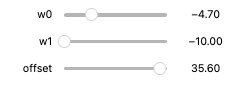

interactive(children=(FloatSlider(value=0.0, description='w0', max=10.0, min=-10.0), FloatSlider(value=0.0, de…

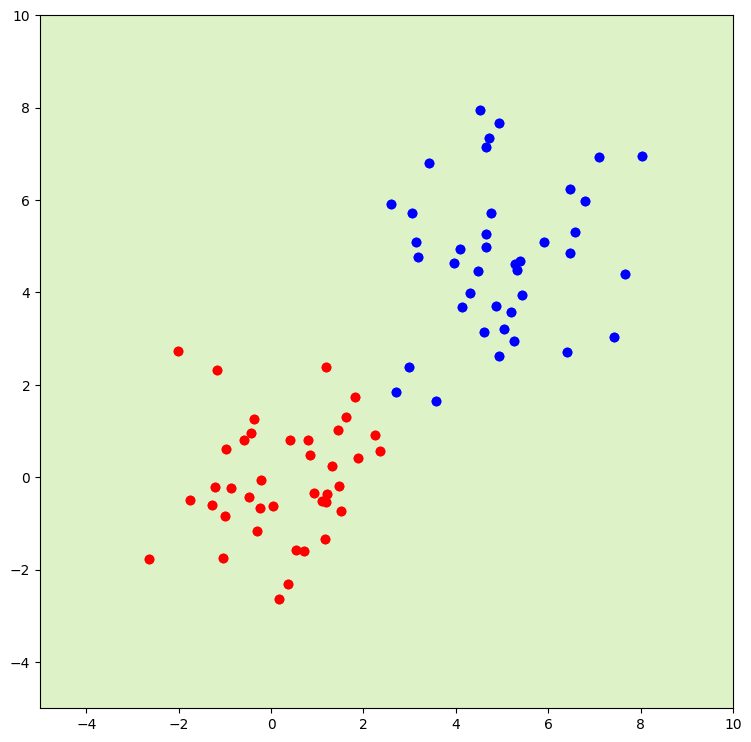

In [2]:
# Ensure that plots are displayed inline in the Jupyter Notebook
%matplotlib inline

# Import necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
#from IPython.html.widgets import interact  # For interactive widgets
from ipywidgets import interact

# Generate synthetic data
# Create two sets of points with different means and standard deviations
X = np.concatenate([1.25*np.random.randn(40,2), 5+1.5*np.random.randn(40,2)]) 
y = np.concatenate([np.ones((40,1)), -np.ones((40,1))])

# Function to visualize the data and the decision boundary of a simple model
def human_learning_algorithm(X, y):
    # Plot the first set of points in red
    plt.scatter(X[0:40, 0], X[0:40, 1], color='r')
    # Plot the second set of points in blue
    plt.scatter(X[40:, 0], X[40:, 1], color='b')
    
    # Set up a grid of points for evaluating the model
    delta = 0.025
    xx = np.arange(-5.0, 10.0, delta)
    yy = np.arange(-5.0, 10.0, delta)
    XX, YY = np.meshgrid(xx, yy)  # Create a meshgrid for the XY plane
    Xf = XX.flatten()
    Yf = YY.flatten()
    sz = XX.shape
    data = np.concatenate([Xf[:, np.newaxis], Yf[:, np.newaxis]], axis=1)

    # Function to display the model's decision boundary
    def hml_display(w0, w1, offset):
        w = np.array([w0, w1])
        w.shape = (2, 1)
        # Evaluate the model for a given set of weights and offset
        Z = data.dot(w) + offset
        Z.shape = sz
        # Re-plot the data points
        plt.scatter(X[0:40, 0], X[0:40, 1], color='r')
        plt.scatter(X[40:, 0], X[40:, 1], color='b')
        # Display the decision boundary and the evaluation of the model on the grid
        plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5, 10, -5, 10), alpha=0.3, vmin=-15, vmax=15)
        plt.contour(XX, YY, Z, [0])  # Draw the contour line where the model output is zero
        fig = plt.gcf()
        fig.set_size_inches(9, 9)

    # Create interactive sliders for model parameters w0, w1, and offset
    interact(hml_display, w0=(-10., 10.), w1=(-10., 10.), offset=(-20., 40.))

# Call the function to display the initial plot and interactive widgets
human_learning_algorithm(X, y)

**QUESTION:** 
Describe the process you used for fitting the classifier
</div>

**Some notes on the learning process**
<p>
The main goal of any learning process is to achive the maximum predictive power (*accuracy*). This is minimize the error. However, there are three other important properties we usually desire our models to have:


 - **Simplicity** - how much fiddling do we need for the method to work? Can I modify it to handle the particularities of my problem?
 - **Speed** - How long does it take to train a reliable model? (training time) Can I use it in embedded and real time applications? (testing time), How long do I have to wait for processing my 1YB (yottabyte - 1e24 Bytes) dataset?
 - **Interpretability** - Why did it make these predictions?

<p>
It happens that accuracy trades off with all the rest of the desirable properties. 
</div>

## Overfitting intro: visualize overfitting


Note to the teacher: the code is not important in the next cell - what is important is that the students visually understand the concept that if you increase complexity, you risk overfitting

interactive(children=(IntSlider(value=25, description='C', max=50, min=1), IntSlider(value=510, description='N…

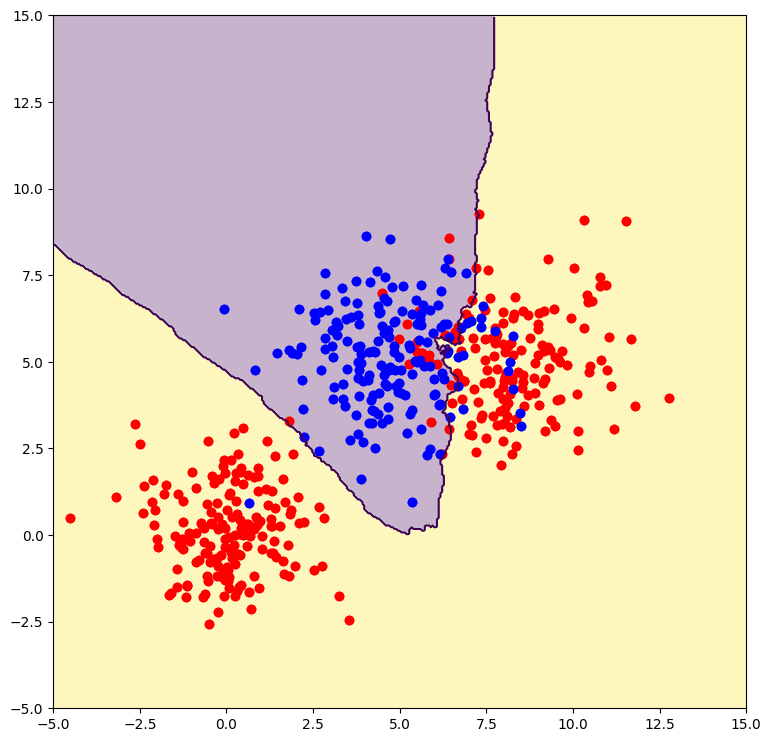

In [3]:
%reset -f
import numpy as np
import matplotlib.pyplot as plt
#from IPython.html.widgets import interact
from ipywidgets import interact
from sklearn import neighbors

MAXC=50
MAXN=1000
X = np.concatenate([1.25*np.random.randn(MAXN,2),5+1.5*np.random.randn(MAXN,2)]) 
X = np.concatenate([X,[8,5]+1.5*np.random.randn(MAXN,2)])
y = np.concatenate([np.ones((MAXN,1)),-np.ones((MAXN,1))])
y = np.concatenate([y,np.ones((MAXN,1))])
perm = np.random.permutation(y.size)
X = X[perm,:]
y = y[perm]


def complexity_number(C,N):
    
    Xr=X[:N,:]
    yr=y[:N]
    idxplus = yr==1
    idxminus = yr==-1
    idxplus = idxplus.flatten()
    idxminus = idxminus.flatten()
    plt.scatter(Xr[idxplus,0],Xr[idxplus,1],color='r')
    plt.scatter(Xr[idxminus,0],Xr[idxminus,1],color='b')   
    delta = 0.05
    xx = np.arange(-5.0, 15.0, delta)
    yy = np.arange(-5.0, 15.0, delta)
    XX, YY = np.meshgrid(xx, yy)
    Xf = XX.flatten()
    Yf = YY.flatten()
    sz=XX.shape
    data = np.concatenate([Xf[:,np.newaxis],Yf[:,np.newaxis]],axis=1);
    #Evaluate the model for a given weight
    clf = neighbors.KNeighborsClassifier(MAXC-C+1)
    clf.fit(Xr,yr.ravel())
    Z=clf.predict(data)
    Z.shape=sz
    plt.scatter(Xr[idxplus,0],Xr[idxplus,1],color='r')
    plt.scatter(Xr[idxminus,0],Xr[idxminus,1],color='b')
    plt.imshow(Z, interpolation='bilinear', origin='lower', extent=(-5,15,-5,15),alpha=0.3, vmin=-1, vmax=1)
    plt.contour(XX,YY,Z,[0])
    fig = plt.gcf()
    fig.set_size_inches(9,9)
   
#Ipython 2.0
interact(complexity_number,  C=(1,MAXC), N = (20,MAXN));
#Ipython 1.1.
#C=1 #1...50
#N = 20 #20...1000
#complexity_number(C,N)

**EXERCISE:** 
<li> Set the number of data samples per cluster $N$ to $100$ and the complexity value $C$ to $50$. Describe what you observe: Does the method missclassify any data sample? 
<li> Decrease the complexity value to $C = 20$. Describe the boundary: Does the method missclassify any data sample?
<li> Which of the two settings do you think will perform the best in front of new data from the same distribution? Why?
<li> Increase the number of data points to $N = 1000$ with $C=50$. Describe what you observe. Will the method perform better than the same method with $N=100$?
</div>

## Learning curves

Let us visualize the behavior observed. For this purpose we may draw a curve of the training error and test error as the number of training data increases for a given complexity. This curve is called **learning curve**.

### Stand Alone Reading: intro to learning curves

![LC_graph](images/learning_curve.png)

**Understanding Learning Curves**

The graph we're observing is known as a "learning curve". It represents how the error rates of a machine learning model change as the size of the training dataset increases. The red line denotes the error on the test set (generalization error), and the blue line represents the error on the training set (training error).

**Observations from the Learning Curve**

- **Convergence to Bias:** As the number of training samples increases, both the training and test errors converge towards a stable value. This stable value can be interpreted as the inherent bias of the model, which is the error rate that our model will always have, even if we had an infinite amount of training data. Bias is a result of the model’s assumptions not aligning perfectly with the true relationships in the underlying data.

- **Overfitting with Small Training Sets:** With a very small amount of training data, the training error is quite low, which might initially seem positive. However, the corresponding test error is significantly higher, indicating that the model is overfitting. Overfitting happens because the model learns patterns that are specific to the small training set but do not generalize to the broader distribution of data.

- **Error Rate Plateau:** Beyond a certain point, adding more training samples does not result in substantial improvements in the test error. This plateau indicates that simply adding more data will not improve the model's performance and suggests that we have reached the limit of what the model can learn given its current capacity.

**Theoretical Explanation**

Learning curves are grounded in statistical learning theory. Theoretically, we expect a model's training error to increase and the test error to decrease as the number of training examples grows. Initially, with few data points, a model is able to fit the training data very closely. As more data points are added, it becomes harder for the model to fit all points perfectly, hence the training error increases. Conversely, with more data, the model's generalization to unseen data improves, thus the test error decreases.

However, both errors will converge to a point where additional data does not change the error rates significantly. This convergence point reflects the model's inherent bias and variance trade-off.

- **Bias:** Represents error from erroneous assumptions in the learning algorithm. High bias can cause the model to miss relevant relations between features and target outputs (underfitting).

- **Variance:** Represents error from sensitivity to small fluctuations in the training set. High variance can cause overfitting: modeling the random noise in the training data, rather than the intended outputs.

Optimizing a model involves finding the right balance between bias and variance, which can be visually analyzed using a learning curve. If the learning curve has reached a plateau and there is still a significant gap between the training and test errors, this may suggest that the model has high variance. In this case, obtaining more training data is unlikely to lead to better generalization. Instead, one might consider increasing the model's complexity or using a more sophisticated algorithm to lower the bias.

In summary, learning curves are a powerful diagnostic tool in machine learning. They help in understanding the behavior of a model as more data is made available and in diagnosing whether the model suffers from high bias or high variance. This understanding can guide decisions on whether collecting more data, selecting a more complex model, or applying techniques like regularization would be beneficial in improving the model's performance.


### Visualizing Learning Curves

Specific errors, like the error in the test data or the training data evolve differently as we increase or decrease some sort of complexity. Depeding on the algorithm, the concept of complexity can change, for example:
 - Size of the data 
 - Depth of a Decision Tree 
 - Number of Nearest neighbors in KNN 
 - And much more 

By observing the graphs as we change these variables, we can learn much about our parameters, algorithm and even dataset

#### Increasing sample size

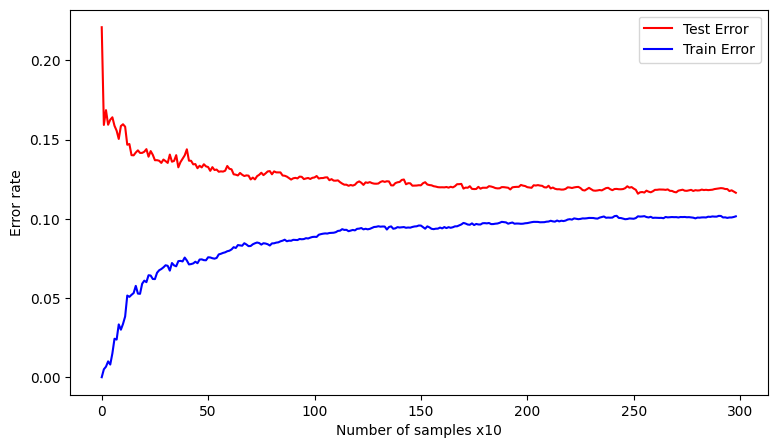

In [4]:
# Reset the namespace by removing all names defined by the user - force reset
%reset -f

# Import necessary libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For plotting
#from IPython.html.widgets import interact  # For interactive widgets (not used in this script but often useful for interactivity)
from ipywidgets import interact
from sklearn import metrics  # For evaluating model performance
from sklearn import tree  # For decision tree models

# Define model complexity and maximum number of samples
C = 5
MAXN = 1000

# Initialize arrays to store error rates for 10 iterations and 299 sample sizes
yhat_test = np.zeros((10, 299, 2))
yhat_train = np.zeros((10, 299, 2))

# Repeat ten times to get smooth curves
for i in range(10):
    # Generate synthetic training data
    X = np.concatenate([1.25*np.random.randn(MAXN,2), 5+1.5*np.random.randn(MAXN,2)]) 
    X = np.concatenate([X, [8, 5]+1.5*np.random.randn(MAXN,2)])
    y = np.concatenate([np.ones((MAXN,1)), -np.ones((MAXN,1))])
    y = np.concatenate([y, np.ones((MAXN,1))])
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    # Generate synthetic testing data
    X_test = np.concatenate([1.25*np.random.randn(MAXN,2), 5+1.5*np.random.randn(MAXN,2)]) 
    X_test = np.concatenate([X_test, [8, 5]+1.5*np.random.randn(MAXN,2)])
    y_test = np.concatenate([np.ones((MAXN,1)), -np.ones((MAXN,1))])
    y_test = np.concatenate([y_test, np.ones((MAXN,1))])

    j = 0
    # Incrementally increase training set size and evaluate the model
    for N in range(10, 3000, 10):
        Xr = X[:N,:]  # Select the first N samples for training
        yr = y[:N]
        
        # Train a decision tree classifier with specified complexity and depth
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(Xr, yr.ravel())  # Fit the model to the training data
        
        # Evaluate the model on both the training and testing data
        yhat_test[i, j, 0] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        yhat_train[i, j, 0] = 1. - metrics.accuracy_score(clf.predict(Xr), yr.ravel())
        j += 1

# Plot the average error rates across all iterations
plt.plot(np.mean(yhat_test[:, :, 0].T, axis=1), 'r', label='Test Error')
plt.plot(np.mean(yhat_train[:, :, 0].T, axis=1), 'b', label='Train Error')
fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.xlabel('Number of samples x10')
plt.ylabel('Error rate')
plt.legend(loc='upper right')

#### Increasing depth, in a decision tree

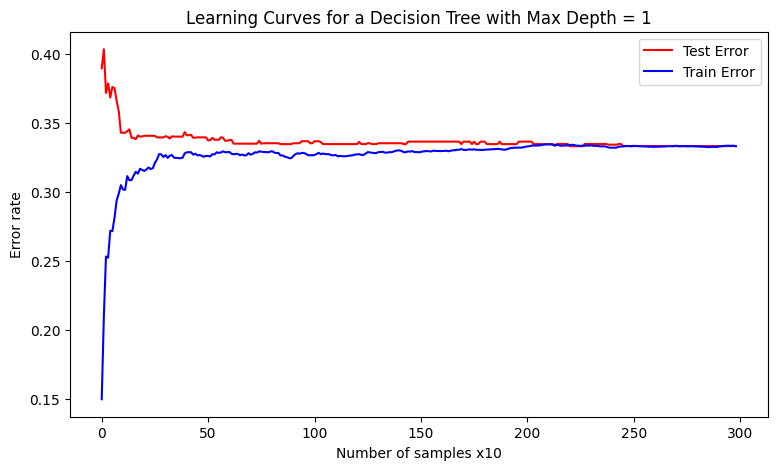

In [5]:
# Clear all variables from the current namespace to start fresh.
#%reset -f
# Initialize arrays to store error rates for 10 iterations and for different numbers of training samples.
#yhat_test = np.zeros((10, 299, 2)) 
#yhat_train = np.zeros((10, 299, 2))

# Import necessary libraries.
import numpy as np  # For numerical operations.
import matplotlib.pyplot as plt  # For plotting graphs.
from sklearn import metrics  # For calculating model performance metrics.
from sklearn import tree  # For using decision tree models.

# Set the complexity of the decision tree to 1 (creating a simple model) and define the maximum number of samples.
C = 1
MAXN = 1000

# Repeat the experiment ten times to get smooth average curves.
for i in range(10):
    # Generate synthetic data for training.
    # Concatenate data from multiple normal distributions to create a diverse dataset.
    X = np.concatenate([1.25*np.random.randn(MAXN,2), 5+1.5*np.random.randn(MAXN,2)]) 
    X = np.concatenate([X, [8, 5]+1.5*np.random.randn(MAXN,2)])
    y = np.concatenate([np.ones((MAXN,1)), -np.ones((MAXN,1))])
    y = np.concatenate([y, np.ones((MAXN,1))])
    
    # Shuffle the data to ensure randomness.
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    # Generate synthetic data for testing.
    # It's important to have a separate test dataset to evaluate the model's generalization.
    X_test = np.concatenate([1.25*np.random.randn(MAXN,2), 5+1.5*np.random.randn(MAXN,2)]) 
    X_test = np.concatenate([X_test, [8, 5]+1.5*np.random.randn(MAXN,2)])
    y_test = np.concatenate([np.ones((MAXN,1)), -np.ones((MAXN,1))])
    y_test = np.concatenate([y_test, np.ones((MAXN,1))])
    
    # Train models with increasing amounts of training data and record their performance.
    j = 0
    for N in range(10, 3000, 10):
        # Take the first N samples for training.
        Xr = X[:N,:]
        yr = y[:N]
        
        # Train a decision tree classifier with a maximum depth of C.
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(Xr, yr.ravel())  # Fit the model to the training data.
        
        # Predict on the test set and calculate the error rate.
        yhat_test[i, j, 1] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        # Predict on the training set and calculate the error rate.
        yhat_train[i, j, 1] = 1. - metrics.accuracy_score(clf.predict(Xr), yr.ravel())
        j += 1

# Plot the average test and training error rates across all iterations.
plt.plot(np.mean(yhat_test[:,:,1].T, axis=1), 'r', label='Test Error')
plt.plot(np.mean(yhat_train[:,:,1].T, axis=1), 'b', label='Train Error')

# Configure the plot with labels and set the figure size for better readability.
fig = plt.gcf()
fig.set_size_inches(9, 5)
plt.xlabel('Number of samples x10')
plt.ylabel('Error rate')
plt.title('Learning Curves for a Decision Tree with Max Depth = 1')
plt.legend(loc='upper right')
plt.show()  # Display the plot.

We can see a similar behavior in this second curve. Let us compare two plots: both train and test error as well as a lower and higher complexity

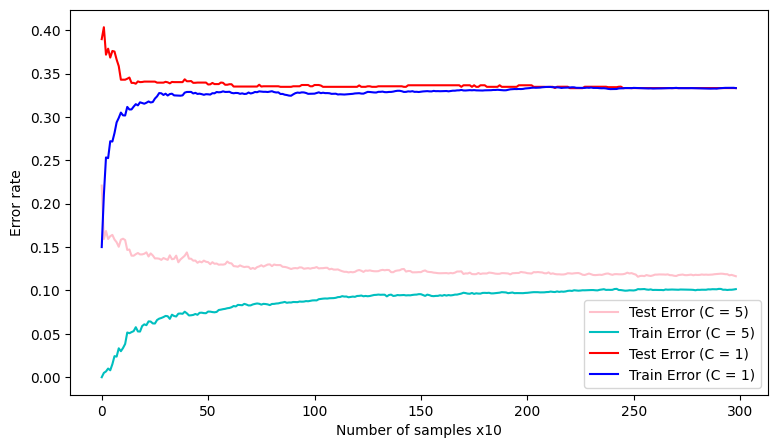

In [6]:
# Plot the average test error for the first set of experiments with higher complexity (C = 5) in pink.
p1, = plt.plot(np.mean(yhat_test[:,:,0].T,axis=1), color='pink', label='Test Error (C = 5)')

# Plot the average training error for the first set of experiments with higher complexity (C = 5) in cyan.
p2, = plt.plot(np.mean(yhat_train[:,:,0].T,axis=1), 'c', label='Train Error (C = 5)')

# Plot the average test error for the second set of experiments with lower complexity (C = 1) in red.
p3, = plt.plot(np.mean(yhat_test[:,:,1].T,axis=1), 'r', label='Test Error (C = 1)')

# Plot the average training error for the second set of experiments with lower complexity (C = 1) in blue.
p4, = plt.plot(np.mean(yhat_train[:,:,1].T,axis=1), 'b', label='Train Error (C = 1)')

# Configure the figure size for better visibility.
fig = plt.gcf()
fig.set_size_inches(9, 5)

# Label the x-axis as 'Number of samples x10'.
plt.xlabel('Number of samples x10')

# Label the y-axis as 'Error rate'.
plt.ylabel('Error rate')

# Add a legend to the plot to identify each line.
plt.legend(handles=[p1, p2, p3, p4], labels=["Test Error (C = 5)", "Train Error (C = 5)", "Test Error (C = 1)", "Train Error (C = 1)"])

# Display the plot.
plt.show()

#### Stand alone reading: learning curves observations

**Analyzing Learning Curves with Decreased Complexity**

In the provided code, we repeat an experiment to plot learning curves of a decision tree classifier, this time with a complexity (`C`) of 1, indicating a simpler model with a maximum depth of 1. By iterating over this process ten times and averaging the results, we aim to obtain smooth learning curves that represent the average behavior of the model.

**Learning Curve Insights with Simpler Models**

- **Increased Bias:** With `C` set to 1, the decision tree is very simple and likely to have a high bias, meaning it makes strong assumptions about the shape of the decision boundary. In practice, this can lead to underfitting, where the model is too simplistic to capture the complexity of the data.

- **Converging Error Rates:** Similar to the previous example, as the number of training samples increases, we expect both training and test errors to converge. However, due to the increased bias, they may converge at a higher error rate compared to a more complex model.

- **Error Rate Plateau:** The plateau or leveling off of the error rate occurs at a higher value, which is indicative of the model's limited capacity. Since the model is simple, it might not benefit as much from additional training data beyond a certain point.

**Theoretical Background**

The learning curves plotted here are based on the theoretical understanding of model complexity's impact on learning. A simpler model with `C=1` will generally exhibit the following characteristics:

- **Higher Training Error:** A simpler model will not fit the training data as well, leading to higher training error.
  
- **Lower Variance:** The gap between training and test errors is typically smaller for simpler models, as they are less sensitive to the specific noise in the training data.

- **Early Plateau:** Due to the simplicity of the model, the error rates will plateau early as there is less capacity for the model to learn from additional data.

**Practical Implications**

When the decision tree depth is limited to one level (`C=1`), the decision boundary is essentially a single split based on one feature. This simplicity can be beneficial if we suspect that one feature is predominantly important, but more often than not, real-world data is more complex, and such a simple model will underperform.

The learning curve will likely show a higher error rate that stabilizes quickly, reflecting the model's inability to further reduce error, regardless of more training data. This situation suggests 

The learning curves showcases two decision tree models with different levels of complexity, quantified by the depth of the trees. The red and pink lines represent the test error for models with complexities `C = 5` and `C = 1` respectively, while the blue and cyan lines represent the corresponding training errors.

**Key Observations and Interpretations**

- **Early Convergence for Simpler Model:** The learning curves for the simpler model (`C = 1`) converge more rapidly than those for the complex model (`C = 5`). This is indicative of a model that has fewer parameters and thus less capacity to fit the data, leading to a quicker stabilization of error rates.

- **Higher Error Plateau for Simpler Model:** The plateau of the error rate for `C = 1` is at a higher level compared to `C = 5`, suggesting that the simpler model has a higher bias and is likely underfitting the data.

- **Training vs. Test Error:** For the complex model (`C = 5`), there is a noticeable gap between the training and test error rates, suggesting a variance issue where the model might be overfitting the training data. However, the simpler model (`C = 1`) shows a smaller gap, which is characteristic of a high bias model that does not fit the training data as well.

**Theoretical Insights**

- **Bias-Variance Tradeoff:** The convergence value that both errors approach is known as the **bias** of the model. The gap between the training and test errors can be considered as the **variance**. High bias is often a sign of underfitting, while high variance indicates overfitting.

- **Model Complexity and Data Fit:** A model with `C = 5` is more complex and has a lower bias, allowing it to fit the training data better. However, this also means it has a higher variance, making it prone to overfitting. Conversely, the model with `C = 1` is too simple to capture the complexities of the data, leading to a higher bias and lower variance.

- **Understanding Learning Curves:** Learning curves are a powerful diagnostic tool. They provide visual cues about whether adding more data will likely improve the model (if the curves are still descending) or whether a model might benefit from increased complexity (if the curves have plateaued far above the desired error rate).

**Conclusions**
In practice, these insights help us make informed decisions about model selection and training:

- For the simpler model (`C = 1`), we may need to increase complexity to reduce bias if the error rates are unsatisfactorily high.
- For the more complex model (`C = 5`), we should look into techniques such as pruning, regularization, or gathering more data to combat overfitting if the test error is significantly higher than the training error.

Ultimately, the aim is to find a balance where both bias and variance are minimized, providing the best possible generalization for new, unseen data.

## Learning Curves and Overfitting

Lets examine the learning behavior of a model while systematically varying its complexity. By observing how the learning curves change as we adjust the model's capacity to learn from a fixed number of examples, we can gain deeper insight into the relationship between model complexity and overfitting.

**QUESTION:** If we vary the complexity of a model, what do you expect to happen to the Train Error? And to the Test Error?

##### Answer (keep closed)

<div>
<img src="https://education-team-2020.s3.eu-west-1.amazonaws.com/ai-eng/bias-variance-tradeof.png" alt='bias-variance' width="500"/>
</div>

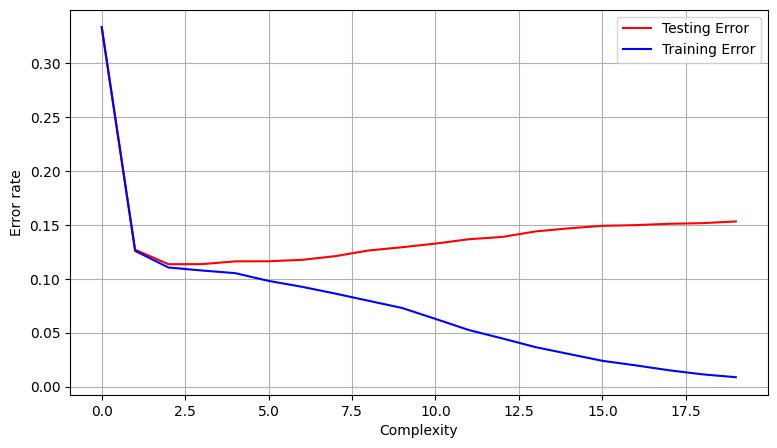

In [7]:
# Clear all variables from the current namespace to start with a clean slate.
%reset -f

# Import necessary libraries for numerical operations and plotting.
import numpy as np
import matplotlib.pyplot as plt
from sklearn import metrics  # For evaluating model accuracy
from sklearn import tree  # For using decision tree models

# Define maximum complexity, number of samples for training and testing, and number of iterations.
MAXC = 20  # Maximum complexity
N = 1000  # Number of training samples
NTEST = 4000  # Number of testing samples
ITERS = 3  # Number of iterations for averaging

# Initialize arrays to store the testing and training error rates.
yhat_test = np.zeros((ITERS, MAXC, 2))
yhat_train = np.zeros((ITERS, MAXC, 2))

# Repeat the experiment several times to get smoother average error curves.
for i in range(ITERS):
    # Generate synthetic training data from a mixture of normal distributions.
    X = np.concatenate([1.25*np.random.randn(N,2), 5+1.5*np.random.randn(N,2)]) 
    X = np.concatenate([X, [8,5]+1.5*np.random.randn(N,2)])
    y = np.concatenate([np.ones((N,1)), -np.ones((N,1))])
    y = np.concatenate([y, np.ones((N,1))])
    
    # Randomly shuffle the training data.
    perm = np.random.permutation(y.size)
    X = X[perm,:]
    y = y[perm]

    # Generate synthetic testing data using the same distributions as the training data.
    X_test = np.concatenate([1.25*np.random.randn(NTEST,2), 5+1.5*np.random.randn(NTEST,2)]) 
    X_test = np.concatenate([X_test, [8,5]+1.5*np.random.randn(NTEST,2)])
    y_test = np.concatenate([np.ones((NTEST,1)), -np.ones((NTEST,1))])
    y_test = np.concatenate([y_test, np.ones((NTEST,1))])
    
    # Loop over a range of complexities for the decision tree model.
    j = 0
    for C in range(1, MAXC+1):
        # Train a decision tree classifier with the current complexity (depth).
        clf = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=C)
        clf.fit(X, y.ravel())  # Fit the model to the training data.
        
        # Evaluate the model on the testing set and record the error rate.
        yhat_test[i, j, 0] = 1. - metrics.accuracy_score(clf.predict(X_test), y_test.ravel())
        # Evaluate the model on the training set and record the error rate.
        yhat_train[i, j, 0] = 1. - metrics.accuracy_score(clf.predict(X), y.ravel())
        j += 1

# Plot the average testing error (in red) and training error (in blue) across all iterations.
p1, = plt.plot(np.mean(yhat_test[:,:,0].T,axis=1), 'r', label='Testing Error')
p2, = plt.plot(np.mean(yhat_train[:,:,0].T,axis=1), 'b', label='Training Error')

# Set the figure size for clear visibility.
fig = plt.gcf()
fig.set_size_inches(9, 5)

# Label the axes and add a legend to the plot.
plt.xlabel('Complexity')
plt.ylabel('Error rate')
plt.legend(handles=[p1, p2], labels=["Testing Error", "Training Error"])

# Enable the grid for better readability of the plot.
plt.grid(True)

# Display the plot.
plt.show()

### Stand Alone Reading: Learning Curves and overfitting

Overfitting is a fundamental concept in machine learning that occurs when a model learns the training data too well, including its noise and outliers, which diminishes its ability to generalize to new, unseen data. It is typically characterized by a significant discrepancy between the performance on the training data and the testing data, where the model performs exceptionally well on the training data but poorly on the testing data.

To illustrate this phenomenon, we will examine the learning behavior of a model while systematically varying its complexity. By observing how the learning curves change as we adjust the model's capacity to learn from a fixed number of examples, we can gain deeper insight into the relationship between model complexity and overfitting.

Learning curves are powerful visual tools that show the error rates of a model on both the training and testing sets over a range of complexities. A model with too little complexity may underfit and fail to capture important patterns in the data, whereas a model with too much complexity may overfit and capture too much noise. By plotting these curves, we aim to find the 'sweet spot' where the model is complex enough to learn the underlying patterns but simple enough to maintain good generalization to new data.

In this section, we will explore how varying levels of complexity influence the learning process and lead to either underfitting or overfitting. We will use graphical representations to make these concepts more tangible and to demonstrate the practical impact of model complexity on learning outcomes.


The plot above provides a visual representation of the relationship between model complexity and error rates, which is a key factor in understanding overfitting in machine learning models.

**Training Error vs Testing Error**

As depicted in the graph, the training error (shown in blue) decreases consistently as model complexity increases. This is expected because a more complex model has more parameters or decision rules that can capture the intricate patterns and nuances in the training data. However, this does not necessarily mean that a complex model is better.

**The Phenomenon of Overfitting**

The testing error (shown in red) initially decreases with complexity, reflecting that the model's capacity to generalize is improving. But past a certain point, the testing error starts to increase, even as the training error continues to decrease. This divergence is the hallmark of overfitting. It indicates that while the model is becoming increasingly tuned to the training data, it's also becoming less capable of performing well on unseen data.

The increase in testing error suggests that the model's complexity has surpassed the optimal level. Instead of learning the underlying trend of the data, the model begins to learn the noise in the training set. This reduces its ability to generalize, which is counterproductive to the purpose of predictive modeling.

**Conclusion**

The optimal model complexity is at the point just before the testing error begins to rise. At this juncture, the model is complex enough to capture the necessary patterns in the data but not so complex that it starts to learn the noise. Balancing model complexity is therefore crucial to build robust models that generalize well to new data, avoiding the pitfalls of overfitting.


**QUESTION:** Let us go back to regression problems. Consider that we know the underlying model generating data samples. For example, data is generated by a 10th order polynomial. Mark all the correct answers:

<li> I will use a 10th order polynomial as my model.
<li> I will use a 2nd order polynomial as my model.
<li> If I have a small number of data I have to use a small order polynomial.
<li> If I have a large amount of data I may use a tenth order polynomial.
</div>

## Cures to overfitting




### Stand Alone Reading:

Overfitting is like memorizing the answers to a test rather than understanding the subject. It occurs when our model learns the training data so well, including noise and details that aren't relevant, that it performs poorly on any new data. Think of it as studying so hard from a specific textbook that you can't answer questions from any other book. To prevent this, we have several strategies:

- **Model Selection via Hyperparameter Tuning**: Hyperparameters are the settings on our model that we can adjust to control its learning process. For example, in a decision tree, we can limit how deep the tree grows. Choosing the right hyperparameters is like picking the right level of detail to study: too little, and you don't learn enough; too much, and you learn unnecessary details. 

    A common approach to find the best hyperparameters is through **cross-validation**. This technique involves splitting the data into several parts, training the model on some parts and testing it on others, and then doing this multiple times. It's like doing several practice exams to find the best way to study. The hyperparameter values that give the best performance on the test parts of the data are usually a good choice.
    

- **Regularization**: Regularization is a technique that discourages learning a more complex or flexible model, so as to prevent overfitting. This is done by adding a penalty for complexity to the model's error during the training process. 

    Think of regularization like a rule in essay writing that limits the number of words you can use. If you're forced to write your essay in fewer words, you'll only focus on the most important points. Regularization does this by penalizing the model for being too complex.
    

- **Ensembles**: Ensembles involve combining the predictions from multiple models to improve robustness over a single model. Imagine if, instead of taking a test on your own, you could form a team with your classmates and submit a single combined set of answers that you all agree upon. This is the idea behind ensembles: by pooling the knowledge from various models, we can often get a more accurate and reliable prediction. 

    One common ensemble method is called **bagging**, where we create many random variations of the training data, build a model for each one, and then get the final output by averaging the results or letting them vote. Another method is **boosting**, where models learn in succession, each one trying to correct its predecessor's mistakes.
    
Each of these methods has its own advantages and is suitable for different situations. By understanding and applying these strategies, we can create models that not only fit the training data well but also perform excellently on unseen data.

### Cure I: Use model selection and Cross Validation


The art of model selection is akin to choosing the right tool for a task; not all tools are suitable for every job. Previously, we discussed how to select between different classifiers by comparing their generalization error, denoted as ${E}_{\text{out}}$. The classifier that demonstrated the lowest ${E}_{\text{out}}$ was typically our tool of choice, as it indicated the best performance on unseen data.

> **Insight:** Selecting the best hyperparameters for a model is conceptually similar to choosing the best classifier. Imagine having a toolbox where each tool has adjustable settings (hyperparameters) that can alter its effectiveness. Our objective is to determine the optimal settings that enhance the tool's (model's) performance for our specific task.

To achieve this, we employ a technique known as **cross-validation**. This involves dividing our dataset into several smaller sets, training our model on some and validating its performance on the others. Through this iterative process, we can gauge the effectiveness of different hyperparameter configurations.

[Cross-validation](https://www.youtube.com/watch?v=fSytzGwwBVw&ab_channel=StatQuestwithJoshStarmer)

The procedure of fine-tuning and validating these settings to identify the most effective model is referred to as **hyperparameter validation**. It is a crucial step in the model-building process, ensuring that we not only fit our model well to the training data but also enhance its ability to generalize to new, unseen data. This is how we transform raw data into a polished lens, bringing the patterns within into sharper focus, enabling our model to make accurate predictions in a variety of scenarios.

By meticulously selecting our model's hyperparameters, we strike a balance between the nuances of our data and the predictive power of our model, thus administering a remedy to the common ailment of overfitting.


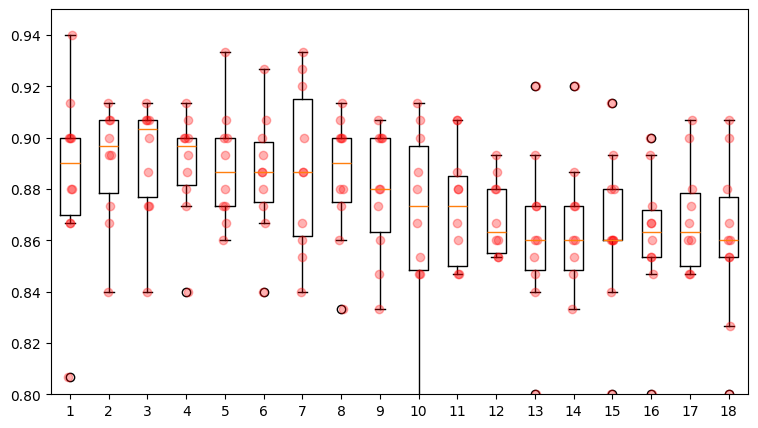

In [8]:
# Clear all variables from the current namespace to avoid conflicts.
%reset -f

# Import necessary packages.
import numpy as np  # For numerical computations.
import matplotlib.pyplot as plt  # For plotting graphs.
from sklearn import metrics  # For calculating accuracy and other performance metrics.
from sklearn import tree  # For decision tree models.
from sklearn import model_selection  # For cross-validation and model selection utilities.

# Create a synthetic dataset for the demonstration.
N = 500  # Number of samples
# Generate points from normal distributions to form our dataset.
X = np.concatenate([1.25*np.random.randn(N,2), 5+1.5*np.random.randn(N,2)]) 
X = np.concatenate([X, [8, 5]+1.5*np.random.randn(N,2)])
y = np.concatenate([np.ones((N,1)), -np.ones((N,1))])
y = np.concatenate([y, np.ones((N,1))])

# Set up a 10-fold cross-validation. This will split our data into 10 parts.
kf = model_selection.KFold(n_splits=10, shuffle=True, random_state=0)
kf.get_n_splits()

# Prepare to search for the best complexity parameter from the given range.
C = np.arange(2, 20)  # Range of model complexities to evaluate.

# Initialize an array to store accuracy scores for different folds and complexities.
acc = np.zeros((10, len(C)))  # 10 for folds, 18 for the range of complexities.
i = 0
# Perform cross-validation.
for train_index, val_index in kf.split(X):
    # Split the data into training and validation sets for the current fold.
    X_train, X_val = X[train_index], X[val_index]
    y_train, y_val = y[train_index], y[val_index]
    
    j = 0
    # Evaluate the model for each complexity level.
    for c in C:
        # Initialize and train a decision tree classifier at the current complexity level.
        dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=c)
        dt.fit(X_train, y_train.ravel())  # Train the model.
        yhat = dt.predict(X_val)  # Predict validation set outcomes.
        
        # Calculate and store the accuracy for the current fold and complexity.
        acc[i][j] = metrics.accuracy_score(yhat, y_val)
        j += 1
    i += 1

# Plot the accuracy for each complexity as a boxplot to show the distribution.
plt.boxplot(acc)
# Overlay the individual accuracy scores for each complexity level.
for i in range(len(C)):
    xderiv = (i+1)*np.ones(acc[:,i].shape) + (np.random.rand(10,)-0.5)*0.1
    plt.plot(xderiv, acc[:,i], 'ro', alpha=0.3)  # 'ro' indicates red circle markers.

# Set the limits for the y-axis to focus on the range of interest.
plt.ylim((0.80, 0.95))

# Configure the figure size for better visibility.
fig = plt.gcf()
fig.set_size_inches(9, 5)

In the machine learning, selecting the right model is as crucial as fitting the model itself. It's like choosing the right key for a lock; the correct one fits perfectly and unlocks potential. In our quest to find this "perfect fit," we employ a technique known as **cross-validation**. This technique helps us tune our model's hyperparameters, specifically its complexity, to ensure it generalizes well to unseen data.

Here's a step-by-step breakdown of what we're doing in the provided Python code:

1. **Creating a Synthetic Dataset**: We start by generating artificial data, which allows us to control the underlying patterns and noise. This synthetic dataset is a playground where we can freely experiment with our models without the risk of unpredictable real-world data.

2. **Setting up Cross-Validation**: We use a method called K-Fold cross-validation, which involves splitting our dataset into 'K' parts (10 in our case). We train our model on 'K-1' parts and validate it on the remaining part, rotating the validation part each time, so every data point gets a chance to be in the validation set.

3. **Searching for the Best Model Complexity**: We explore a range of complexities for our model, which, in this scenario, is a Decision Tree classifier. The complexity is controlled by the tree's maximum depth, ranging from 2 to 20. A shallow tree (low complexity) might not capture all the patterns (underfit), while a deep tree (high complexity) might learn too much noise (overfit).

4. **Training and Validating the Model**: For each complexity level, we train a new Decision Tree and evaluate its accuracy on the validation set. We repeat this process across all folds of our cross-validation setup.

5. **Analyzing the Results**: We collect the accuracy scores from each fold and complexity level and plot them using boxplots, which show us the distribution of accuracy scores for each complexity level. We also add individual data points to the plot for a granular look at each fold's performance.

6. **Choosing the Optimal Complexity**: The goal is to select the complexity level where the model performs consistently well on different validation sets. This level indicates a good balance between learning the data's patterns and maintaining the ability to generalize.

7. **Visualizing the Outcome**: Finally, we use a graph to visualize our findings. The x-axis represents the model complexity, while the y-axis shows the accuracy rate. The boxplots help us see the variation in performance across different folds, and the red dots represent individual accuracy scores, giving us a sense of the variability in model performance.

Through this process, we aim to strike a delicate balance — a model complex enough to learn the important patterns but simple enough to ignore the noise. This balance is the key to a model that performs well not just on our current data but on future data it has never seen before.


In [9]:
# Calculate the mean accuracy across all cross-validation folds for each complexity level.
macc = np.mean(acc, axis=0)

# Find the index of the complexity level that yields the highest mean accuracy.
idx = np.argmax(macc)

# Print the complexity level (adding 1 because the index starts at 0) and the corresponding accuracy.
# This tells us which model (in terms of complexity) performed the best on average across the cross-validation folds.
print('Complexity: ' + str(idx+1) + ' with accuracy: ' + str(macc[idx]))

Complexity: 3 with accuracy: 0.8959999999999999


This code snippet is performing the final step in model selection via cross-validation. After training and validating the model across a range of complexities, it determines which complexity level gave the best average accuracy, suggesting it as the optimal choice for this particular problem. The print statement provides a clear, human-readable output, showing the chosen model complexity and its validation accuracy, guiding the next steps in the machine learning workflow.

What is the generalization error expected by selecting this method?

In [10]:
# Initialize a decision tree classifier with the optimal complexity found previously.
# 'min_samples_leaf=1' means each leaf node must contain at least 1 sample.
# 'max_depth=idx+1' sets the depth of the tree to the best complexity level identified from cross-validation.
dt = tree.DecisionTreeClassifier(min_samples_leaf=1, max_depth=idx+1)

# Fit the decision tree model to the training data.
# This step involves the model learning from the training data, using the optimal complexity we identified.
dt.fit(X_train, y_train)

# Set the number of samples for generating out-of-sample (new, unseen) data to test the model's generalization.
N = 1000

# Generate out-of-sample data to test the model.
# This data follows the same distribution as the training data but is completely new to the model.
X_test = np.concatenate([1.25*np.random.randn(N,2), 5+1.5*np.random.randn(N,2)]) 
X_test = np.concatenate([X_test, [8,5]+1.5*np.random.randn(N,2)])
y_test = np.concatenate([np.ones((N,1)), -np.ones((N,1))])
y_test = np.concatenate([y_test, np.ones((N,1))])

# Use the trained model to predict the labels of the out-of-sample data.
yhat = dt.predict(X_test)

# Calculate and print the accuracy of the model on the out-of-sample data.
# This gives us an estimate of how well our model can generalize to new data,
# which is crucial for understanding its performance in real-world scenarios.
print(metrics.accuracy_score(yhat, y_test))

0.8846666666666667


This code snippet demonstrates the final evaluation of a decision tree classifier trained with the optimal complexity determined through cross-validation. By generating new, unseen data and testing the model's predictions against the true labels, we assess the model's ability to generalize beyond the training data. The print statement outputs the model's accuracy on this out-of-sample data, providing a quantitative measure of its generalization performance.

### Summary: Train, Test and Validation.

As we have seen the process of assessing the performance of the classifier by estimating the generalization error is called testing. And the process of selecting a model using the estimation of the generalization error is called validation. There is a subtle but critical difference in both and we have to be aware of it when dealing with our problem. 

+ Testing data is used only for assessing performance and will never be used in the learning process.
+ Validation data is used to explicitly select the parameter with best performance according to an estimation of the generalization error. This is a form of learning. 
+ Training data is used for learning the model instance from a model class.

In practice, we are given just training data, and in the most general case we have to explicitly tune some hyper-parameter. Thus, how do we select the different splits?

It will depend on the questions about the method we want to answer:

+ Let us say that our customer ask us to hand her a classifier for a given problem. If we just want to give him the best model then we may use cross-validation on our training data set and select the best performant model. In this scenario, when we return the trained classifier to our customer, we know that it is the one that achieves the best performance. But if the customer asks about the expected performance we can not say anything.

> **A practical issue:** once selected the model we use the complete training set to train the final model.

+ If we want to know the performance of our model we have to use unseen data. Thus, we may proceed in the following way:

    + Split the training set in training and testing data. For example, use $30\%$ of the training set for testing purposes. This data is hold out and will only be used to assess the performance of the method.

    + Use the remanining training data for selecting the hyper-parameters by means of cross-validation.
    
    + Train the model with the selected parameter and assess the performance using the testing data set.

> **A practical issue:** Observe that by splitting in three sets the classifier is trained with a smaller fraction of the data.

+ If we want to make a good comparison of classifiers but we do not care about the best parameters, we may use nested cross-validation. The external cross-validation is used for assessing the performance of the classifier and in each loop of the external cross-validation another cross-validation is run with the remaining training set for selecting the best parameters.

### Stand Alone Reading: Cure II: Use regularization

When we're training models, one of our biggest fears is overfitting - when our model learns the noise in the training data so well that it performs poorly on new, unseen data. Imagine memorizing every answer to a practice test without understanding the concepts; you might ace that practice test but fail the real exam because the questions aren't exactly the same. That's overfitting in a nutshell, and regularization is one of the tools we use to prevent it.

Regularization helps us to control our model's complexity, ensuring it's not too simple (underfitting) nor too complex (overfitting). It does this by adding a penalty on the size of the coefficients, which can be thought of as a way to encourage the model to be as simple as possible while still fitting the data well. 

#### L2 Regularization (Ridge)

L2 regularization, also known as Ridge regularization, adds a penalty equal to the square of the magnitude of coefficients. This method prefers smaller coefficients but does not force them to zero. In many cases, L2 regularization can be seen as encouraging the model's predictions to be "smooth" rather than fluctuating wildly. This smoothness often translates to lower complexity, as it avoids fitting the model too closely to the training data's noise.

[L2 regularization](https://www.youtube.com/watch?v=Q81RR3yKn30&ab_channel=StatQuestwithJoshStarmer)

#### L1 Regularization (Lasso)

On the other hand, L1 regularization, known as Lasso regularization, adds a penalty equal to the absolute value of the magnitude of coefficients. Unlike L2, L1 can reduce some coefficients to zero, effectively performing feature selection. This property is incredibly useful when we suspect that some features may not be important or when we desire a model that is easy to interpret (since it only uses a subset of all the available features). It's also handy when dealing with high-dimensional data, where computational efficiency becomes crucial.

[L1 regularization](https://www.youtube.com/watch?v=NGf0voTMlcs&ab_channel=StatQuestwithJoshStarmer)

#### Selecting the Regularization Strength

Both L2 and L1 regularization have a hyperparameter that controls the strength of the penalty. This hyperparameter is crucial because it balances the trade-off between fitting the training data well and keeping the model simple enough to generalize to new data. Too much regularization might lead to underfitting, while too little could lead to overfitting.

Selecting the optimal regularization strength is, therefore, a form of model selection. We typically use cross-validation to choose this hyperparameter, testing different values to find the one that gives the best performance on a validation set or through a cross-validation process.

In summary, regularization is a powerful concept in machine learning for controlling model complexity and preventing overfitting. By carefully choosing the type of regularization and its strength, we can build models that not only perform well on our training data but are also capable of generalizing to new, unseen data.


### Stand Alone Reading: Cure III: Ensemble (to be mentioned in class in a few lessons)

In our toolkit for fighting the pervasive challenge of overfitting, ensemble methods stand out as a powerful strategy. These techniques involve combining the predictions from multiple models to improve the overall performance and robustness of the prediction. It's akin to seeking advice from a group of experts rather than relying on a single individual's opinion. Among the various ensemble techniques, **Bagging** and **Boosting** are particularly noteworthy for their effectiveness.

#### Bagging: Bootstrap Aggregating

**Bagging**, short for Bootstrap Aggregating, is a technique that aims to reduce variance and avoid overfitting. The core idea behind bagging is to create several subsets of the original training data, with replacement, and then train a separate model on each subset. The final prediction is typically made by averaging the predictions of all models (for regression problems) or by a majority vote (for classification problems). This method is effective because it combines the strength of multiple models, each trained on slightly different data, leading to a more stable and robust prediction. Random Forests, one of the most popular machine learning algorithms, is an example of bagging where decision trees are the base learners.

#### Boosting: Building Strength from Weakness

**Boosting** is another ensemble technique, but it differs from bagging in its approach. Boosting focuses on converting a series of weak models into a strong one. It does so by training models sequentially, where each new model focuses on correcting the errors made by the previous ones. By continuously focusing on the hardest to predict observations, boosting methods, such as AdaBoost and Gradient Boosting, incrementally improve the model's performance. Boosting is particularly noted for its ability to adjust the bias-variance trade-off, achieving high accuracy without falling prey to overfitting as easily as some other methods.

#### Ensemble Methods in Practice

While ensemble methods are incredibly powerful, they also introduce additional complexity, both in terms of understanding and computational requirements. Choosing between bagging and boosting (or other ensemble methods) depends on the specific problem, the type of data, and the models being combined. However, the underlying principle remains the same: by wisely aggregating the predictions from multiple models, we can create a more accurate and robust prediction system.

## Summary: What to do when ...

... our algorithm shows high **bias**.

- **Add more features** If we are able to engineer discriminant features, this might help the classifier to reduce its bias.
- **Use a more sophisticated model**. High bias usually means poor performance. If we are using a very simple model class, this might indicate that this model class is not able to properly fit training data. If our problem uses regularization for modeling complexity we might adjust the hyper-parameter to decrease the complexity.
- **Use fewer samples**. Although this will not improve the results, we might as well train the model with fewer data points just for improving training time without worsening the performance.


... our algorithm shows **high variance**.

- **Use fewer features**. Using a feature selection or dimensionality reduction techniques may be useful, and decrease the over-fitting of the estimator.
- **Use a simpler model**. High variance is usually synonim of closely modeling the training set. This can result in overfitting. In this case we can either use a simpler model class or adjust the regularization hyper-parameter to decrease complexity.
- **Use more training samples**. 
- **Use ensemble techniques**. Some ensemble techniques such as *bootstraping aggregation* are specifically designed to reduce classification variance.